# Examples of reading data from the TIGRESS simulations - MHD_PI datasets

**Welcome to the TIGRESS data release!**

This script focus on reading and analysing the UV radiation post-processed dataset presented in [Kado-Fong et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020ApJ...897..143K/abstract).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../module/") #add path for import
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import tigress_read #scripts for reading data
import yt #https://yt-project.org/

## Examining the simulation model information

In [3]:
#master directory of where the data is stored
dir_master = "../data/" #this is default
model_id = "R8_4pc" #name of the simulation model

First, we can look into what snapshots are available, and what types of datasets they contain.

Each snapshot has an "ivtk" number. This is the Athena4.2 VTK output id. 

The time for each snapshot is ivtk*dt_Myr, where dt_Myr is the output interval per vtk number in Myr.

For the "R8_2pc" simulation, we release the data in the time frame when the simulation has already reached a steady state. The data release time interval is about 10 Myr.

In [4]:
model = tigress_read.Model(model_id, dir_master=dir_master) #reading the model information
print("Snapshots and contained data sets:")
for ivtk in model.ivtks:
    print("ivtk={:d}, t={:.1f} Myr, datasets={}".format(ivtk, ivtk*model.dt_Myr, model.data_sets[ivtk]))

Snapshots and contained data sets:
ivtk=300, t=293.3 Myr, datasets=['MHD', 'MHD_PI']


## Read and analyze the 3D UV radiation post-processing output

Now, we want to look into the detailed 3D simulation data of the simulations. First, we select a snapshot (identified by its ivtk number) and the type of dataset we want to look into ("rad" in this case). Then we need to load the data. Because the data files are large, it can take a while to load.

In [5]:
#load the UV data set for the snapshot ivtk=300
model.load(300, dataset="MHD_PI")

The default `MHD` dataset has fields:
- `density`
- `velocity`
- `pressure`
- `cell_centered_B`

The `MHD_PI` dataset vertically extends from $z=-3584$ pc to $3584$pc, including both low- and high-altitude regions. It also has an additional field produced by UV post-processing:

* `specific_scalar[0]`

representing the equilibrium HI fraction

$$
x_{\rm HI} = n_{\rm HI}/n_{\rm H}
$$ 

obtained by balancing radiative recombination with collisional ionization + photoionization (see Equation 4 in Kado-Fong et al. (2020)). Note that **the ionization by cosmic rays is not considered** as in chemistry post-processed data.

Our yt wrapper adds
* `xHI` and `nHI`
* `xe = xHII = 1 - xHI` and `ne = nHII = nH*(1 - x_HI)`

For simplicity, the electron density is assumed to be equal to the density of H$^+$, i.e., $x_{\rm e} = x_{\rm H^+} = 1 - x_{\rm HI}$.

In [6]:
model.MHD_PI.ytds.field_list

[('athena', 'cell_centered_B_x'),
 ('athena', 'cell_centered_B_y'),
 ('athena', 'cell_centered_B_z'),
 ('athena', 'density'),
 ('athena', 'pressure'),
 ('athena', 'specific_scalar[0]'),
 ('athena', 'velocity_x'),
 ('athena', 'velocity_y'),
 ('athena', 'velocity_z')]


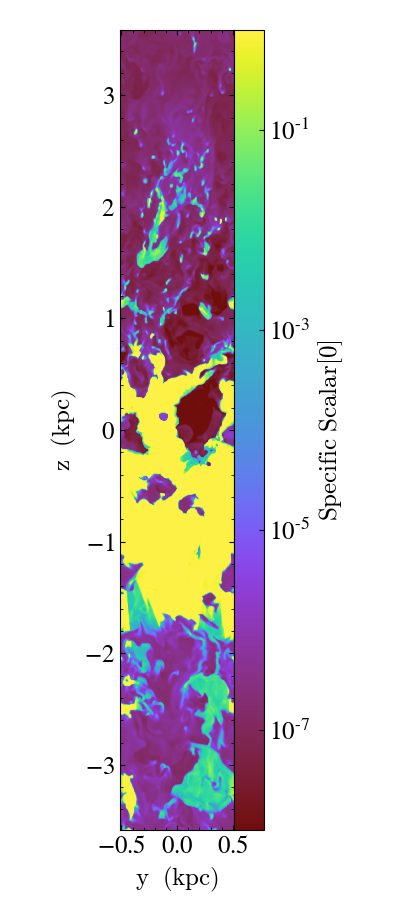

In [7]:
yt.SlicePlot(model.MHD_PI.ytds, "x", fields=["specific_scalar[0]"])

### Use YT to analyse data

The "ytds" member is the standard yt data object. You can use all the standard YT function to plot and analyse the data.

Below is midplane slices of electron fraction, electron number density, and radiation energy densities.


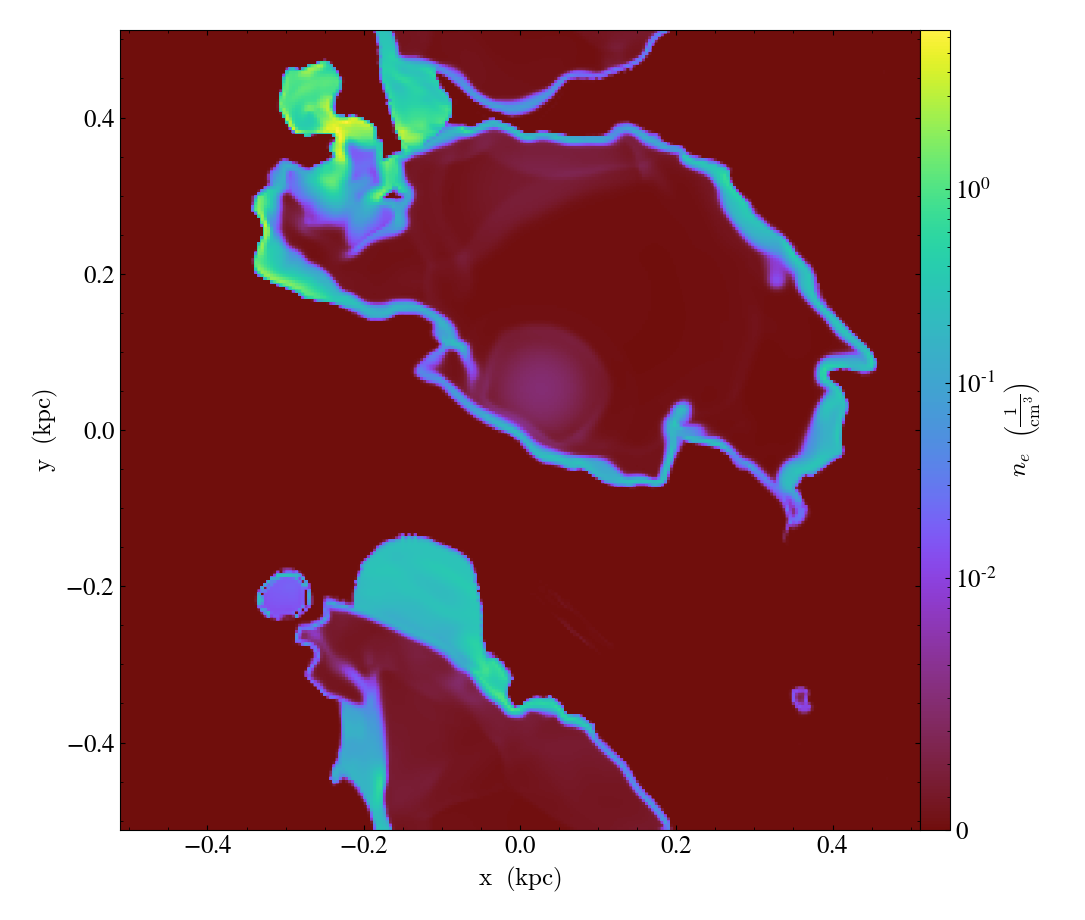
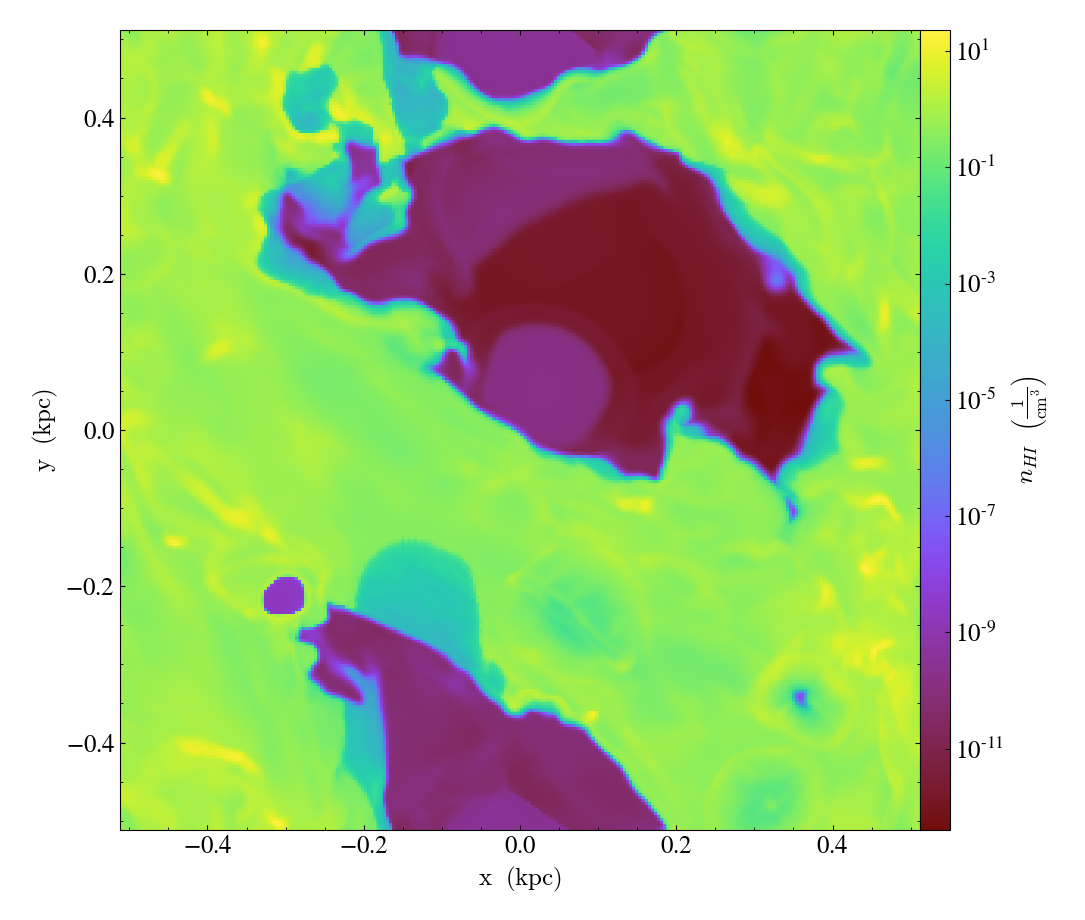

In [8]:
yt.SlicePlot(model.MHD_PI.ytds, "z", fields=["nHI","ne"])


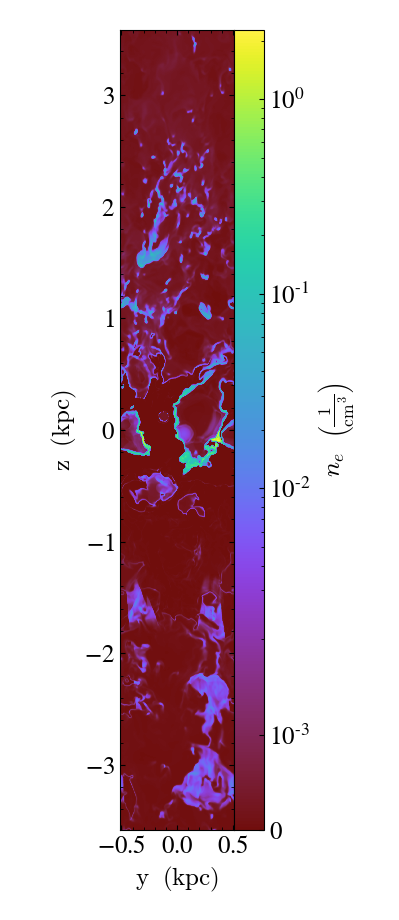
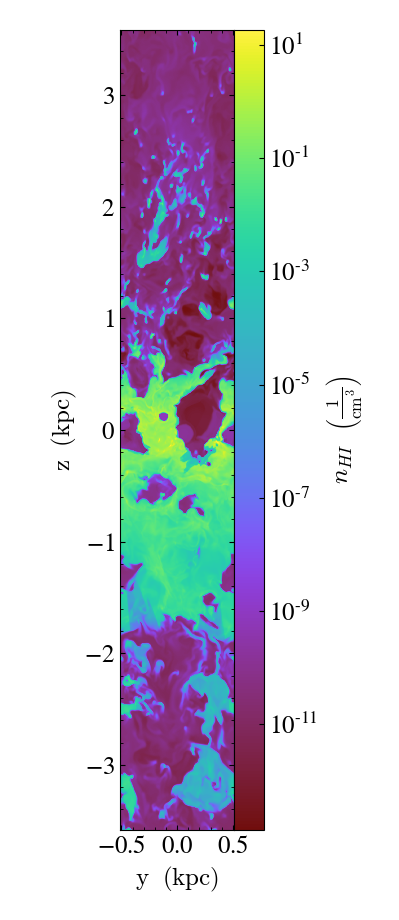

In [10]:
yt.SlicePlot(model.MHD_PI.ytds, "x", fields=["nHI","ne"])